packages that you need for running all cells of this notebook:
* matplotlib
* numpy
* pandas
* scipy
* sklearn
* networkx
* seaborn
* geopandas
* folium
* squarify
* matplotlib_venn
* math
* joypy
* ipysankeywidget
* ipywidgets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [2]:
# colors

# categorical
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=4
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']

# sequential single hue
# http://colorbrewer2.org/#type=sequential&scheme=Blues&n=3

seq_colors = ['#deebf7', '#9ecae1', '#3182bd']


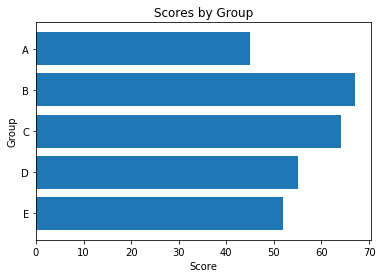

In [3]:
# Bar chart
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
# https://matplotlib.org/gallery/statistics/barchart_demo.html

performance = [45, 67, 64, 55, 52]

bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

plt.barh(y_pos, performance)
 
plt.title("Scores by Group")
plt.xlabel("Score")
plt.ylabel("Group")
plt.yticks(y_pos, bars)

# start with A from top
plt.gca().invert_yaxis()

plt.show()

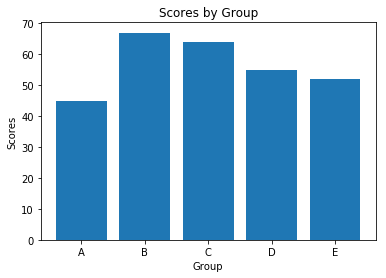

In [4]:
# Column chart
plt.bar(y_pos, performance)
plt.ylabel('Scores')
plt.xlabel('Group')
plt.xticks(y_pos, bars)
plt.title("Scores by Group")

plt.show()

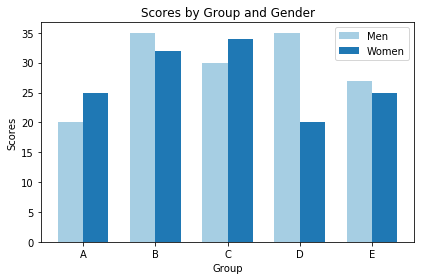

In [5]:
# Side by side column chart
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html
n_groups = 5

means_men = (20, 35, 30, 35, 27)

means_women = (25, 32, 34, 20, 25)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

rects1 = ax.bar(index, means_men, bar_width, color=colors[0], label='Men')
rects2 = ax.bar(index + bar_width, means_women, bar_width, color=colors[1], label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by Group and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

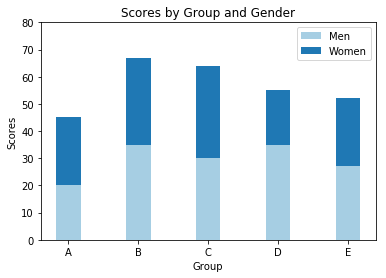

In [6]:
# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

p1 = plt.bar(index, means_men, bar_width, color=colors[0])
p2 = plt.bar(index, means_women, bar_width, bottom=means_men, color=colors[1])

plt.title('Scores by Group and Gender')
plt.xlabel('Group')
plt.xticks(index, ('A', 'B', 'C', 'D', 'E'))
plt.ylabel('Scores')
plt.yticks(np.arange(0, 81, 10))

plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

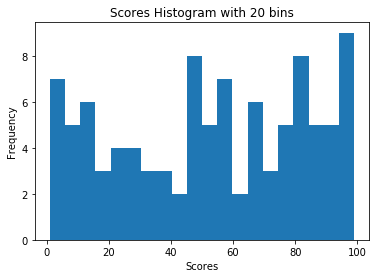

In [7]:
#https://matplotlib.org/gallery/statistics/hist.html

N = 100
bins = 20

np.random.seed(123)
y = np.random.randint(100, size=N)
plt.hist(y, bins=bins)

plt.title('Scores Histogram with {} bins'.format(bins))

plt.xlabel('Scores')
plt.ylabel('Frequency')


plt.show()

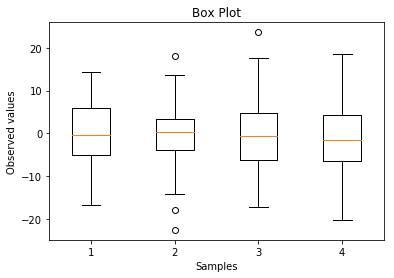

In [8]:
# box plot
# https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html?highlight=violin

# Fixing random state for reproducibility
np.random.seed(123)

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot box plot
plt.boxplot(all_data)
plt.title('Box Plot')

# adding horizontal grid lines
plt.xticks([y + 1 for y in range(len(all_data))])
plt.xlabel('Samples')
plt.ylabel('Observed values')

plt.show()

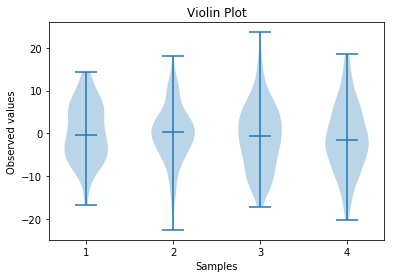

In [9]:
plt.violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
plt.title('Violin Plot')

plt.xticks([y + 1 for y in range(len(all_data))])
plt.xlabel('Samples')
plt.ylabel('Observed values')

plt.show()

In [10]:
# violin plot
# https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html?highlight=violin


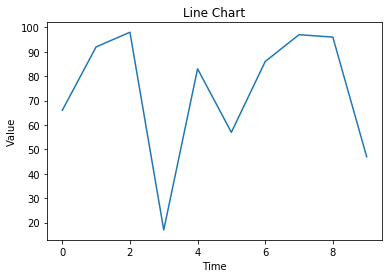

In [11]:
# line chart
# https://matplotlib.org/users/pyplot_tutorial.html

np.random.seed(123)
y = np.random.randint(100, size=10)

plt.plot(y)

plt.title('Line Chart')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

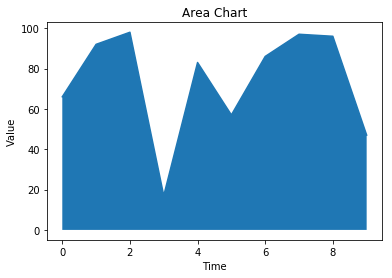

In [12]:
# area
# https://matplotlib.org/gallery/lines_bars_and_markers/fill_between_demo.html
# https://python-graph-gallery.com/240-basic-area-chart/

plt.plot(y)
plt.fill_between(range(10), y)

plt.title('Area Chart')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

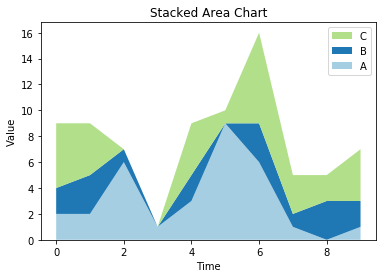

In [13]:
# stacked area chart
# https://matplotlib.org/gallery/lines_bars_and_markers/stackplot_demo.html

np.random.seed(123)
y = np.array([np.random.randint(10, size=10),
              np.random.randint(4, size=10),
              np.random.randint(8, size=10)])

fig, ax = plt.subplots()
ax.stackplot(range(10), y, 
             labels=['A', 'B', 'C'], 
             colors=colors[:3])

plt.title('Stacked Area Chart')
plt.xlabel('Time')
plt.ylabel('Value')
# reverse legend order to match colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

plt.show()

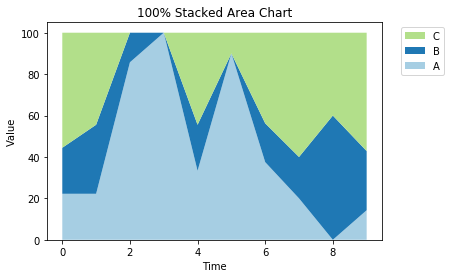

In [14]:
# 100% stacked area chart
# https://python-graph-gallery.com/255-percentage-stacked-area-chart/

# https://stackoverflow.com/questions/16875546/create-a-100-stacked-area-chart-with-matplotlib
percent = y /  y.sum(axis=0).astype(float) * 100 

fig, ax = plt.subplots()
ax.stackplot(range(10), percent, 
              labels=['A', 'B', 'C'], 
              colors=colors[:3])


plt.title('100% Stacked Area Chart')
plt.xlabel('Time')
plt.ylabel('Value')
# reverse legend order to match colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.2,1))

plt.show()

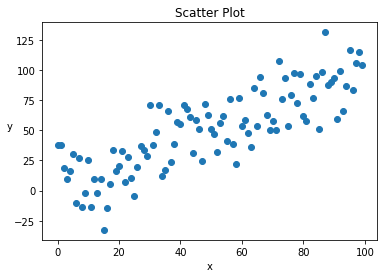

In [15]:
# scatter plot
# https://python-graph-gallery.com/130-basic-matplotlib-scatterplot/

x = range(0,100)
y = np.random.randn(100)*17 + x

plt.scatter(x, y)

plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.show()

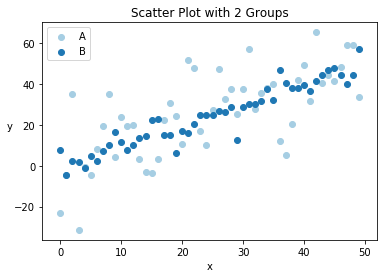

In [16]:
# scatter plot with color

x = range(0,50)
y1 = np.random.randn(50)*17 + x
y2 = np.random.randn(50)*5 + x
plt.scatter(x, y1, c=colors[0], label='A')
plt.scatter(x, y2, c=colors[1], label='B')

plt.title('Scatter Plot with 2 Groups')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

plt.show()

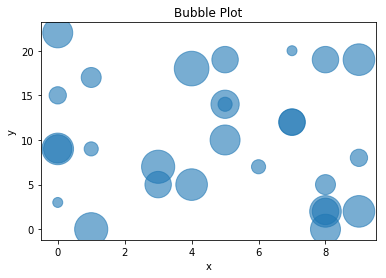

In [17]:
# bubble plot
# https://python-graph-gallery.com/270-basic-bubble-plot/

x = np.random.randint(10, size=30)
y = np.random.randint(23, size=30)
s = np.random.randint(13, size=30)

plt.scatter(x, y, s*100, alpha=.6)

plt.title('Bubble Plot')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

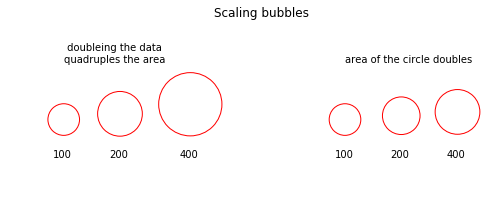

In [18]:
# bubble radius calculation
def calc_r(v, max_v=4000, max_r=2000):
    return np.sqrt(v/max_v)*max_r

x = [0, .4, .9, 2, 2.4, 2.8]
y = [0, .015, .04, 0, .01, .02]
r = [1000, 2000, 4000, calc_r(1000), calc_r(2000), calc_r(4000)]
txt = [100, 200, 400, 100, 200, 400]

fig, ax = plt.subplots(figsize=(8, 3))

for i, v in enumerate(r):
    ax.annotate(txt[i], (x[i]-.075, -.1))

plt.scatter(x, y, r, facecolors='none', edgecolors='r')

#plt.plot([-.05, -.05, -.05, -.05])

plt.title('Scaling bubbles')
plt.axis('off')
ax.annotate(" doubleing the data\nquadruples the area", (0, .15))
ax.annotate("area of the circle doubles", (2, .15))

plt.show()

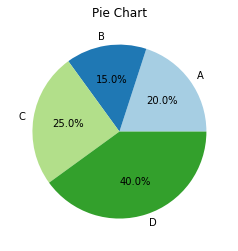

In [19]:
#pie
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

plt.pie([20, 15, 25, 40], 
        labels=['A', 'B', 'C', 'D'], 
        autopct='%1.1f%%',
        colors=colors)

plt.title('Pie Chart')
plt.show()

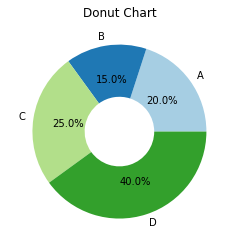

In [20]:
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html
plt.pie([20, 15, 25, 40],  wedgeprops=dict(width=0.6),
        labels=['A', 'B', 'C', 'D'], 
        autopct='%1.1f%%',
        colors=colors)

plt.title('Donut Chart')
plt.show()

/home/dan/anaconda3/envs/art/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


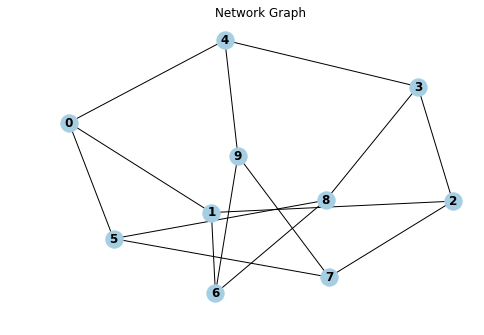

In [21]:
# network graph
# https://networkx.github.io/documentation/stable/tutorial.html

import networkx as nx

G = nx.petersen_graph()
nx.draw(G, with_labels=True, font_weight='bold', node_color=colors[0])
plt.title('Network Graph')
plt.show()

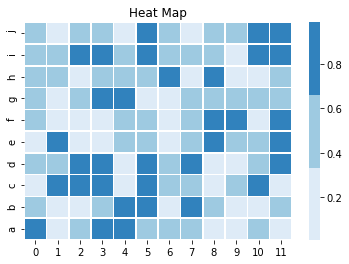

In [22]:
# heatmap
# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib
# https://python-graph-gallery.com/91-customize-seaborn-heatmap/
import seaborn as sns

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5, cmap=seq_colors, yticklabels=['j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a'])

plt.title('Heat Map')

plt.show()

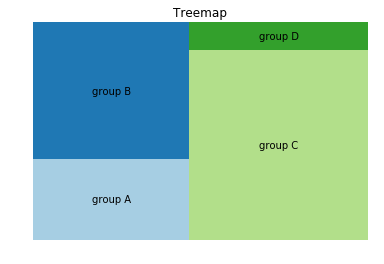

In [23]:
# tree map
# https://python-graph-gallery.com/200-basic-treemap-with-python/
# installed squarify using pip

import squarify

squarify.plot(sizes=[13,22,35,5], 
              label=["group A", "group B", "group C", "group D"], 
              color=colors)

plt.axis('off')
plt.title('Treemap')

plt.show()

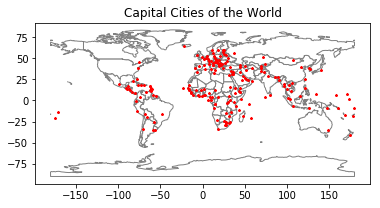

In [24]:
base = world.plot(color='white', edgecolor='gray')

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.plot(ax=base, marker='*', color='red', markersize=5)

plt.title('Capital Cities of the World')
plt.show()

In [25]:
#
# https://python-visualization.github.io/folium/quickstart.html
import folium

m = folium.Map(location=[52.52, 13.4050],
              tiles='Stamen Toner',
              zoom_start=12)
m

In [26]:
# https://www.theguardian.com/news/datablog/2013/mar/15/john-snow-cholera-map#data
# http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/
# https://fusiontables.google.com/DataSource?docid=147wlDisDp6NnpNxHQpbnjAQ-iW4dR2MAmFdQxYc#rows:id=1

import folium
import branca.colormap as cm

cmap = cm.linear.Reds_09

# read pumps.txt
pumps = []
# lat, lon 
with open('data/snow/pumps.txt', 'r') as t:
    next(t)  # skip header
    for line in t:
        # split values and remove new line character (\n)
        v = line[:-1].split(',')
        pumps.append([float(v[0]), float(v[1])])

# read deaths.txt
deaths = []
deaths_max = 0
# lat,lon,deaths
with open('data/snow/deaths.txt', 'r') as t:
    next(t)  # skip header
    for line in t:
        # split values and remove new line character (\n)
        v = line[:-1].split(',')
        deaths.append([[float(v[0]), float(v[1])], int(v[2])])
        deaths_max = max(deaths_max, int(v[2]))

# sort deaths array by number of deaths so the 
# larger/darker circles are in the background and do not hide
# smaller/lighter circles
deaths = sorted(deaths, key=lambda x: x[1], reverse=True)

m = folium.Map(location=[51.513, -0.137], 
               #tiles='Stamen Terrain',
               tiles='Stamen Toner',
               zoom_start=15.5)

# add blue markers for the pumps
for i in pumps:
    folium.Marker(location=i, tooltip='Pump').add_to(m)
    
# add red dots for the deaths
for i in deaths:
    folium.Circle(location=i[0], radius=4, stroke=True, weight=1,
                  tooltip=i[1], fill_color=cmap(i[1]/deaths_max),
                  color='black', 
                  fill=True, fill_opacity=.9).add_to(m)

    
m

In [27]:
# https://www.theguardian.com/news/datablog/2013/mar/15/john-snow-cholera-map#data
# http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/
# https://fusiontables.google.com/DataSource?docid=147wlDisDp6NnpNxHQpbnjAQ-iW4dR2MAmFdQxYc#rows:id=1

import folium
import branca.colormap as cm

def calc_radius(v, max_v, max_r):
    """
    Calculate the radius of the circle so the area is proportional to
    the maximum data point.
    The formula for calculating the radius of the value v is:
    
    .. math::
       max_r  \\sqrt{ \\frac{ v } { max_v } } 
       
    Defined in 'The Truthful Art' by Aberto Cairo, 2016, p. 275 (ISBN 13: 9780321934079)
    
    Parameters
    ----------
    v: int,
        Value of the current data point
   
    max_v: int,
        Value of the maxiumum data point. 
        Used for scaling the current point to the maximum value.
    
    max_r: int,
        Maximum radius that is used for the max_v value.
        All other radius values are 
    
    Returns
    -------
    r: float,
        Radius for the current data point.
    
    """
    r = np.sqrt(v/max_v)*max_r
    return r

cmap = cm.linear.Reds_09

# read pumps.txt
pumps = []
# lat, lon 
with open('data/snow/pumps.txt', 'r') as t:
    next(t)  # skip header
    for line in t:
        # split values and remove new line character (\n)
        v = line[:-1].split(',')
        pumps.append([float(v[0]), float(v[1])])

# read deaths.txt
deaths = []
deaths_max = 0
# lat,lon,deaths
with open('data/snow/deaths.txt', 'r') as t:
    next(t)  # skip header
    for line in t:
        # split values and remove new line character (\n)
        v = line[:-1].split(',')
        deaths.append([[float(v[0]), float(v[1])], int(v[2])])
        deaths_max = max(deaths_max, int(v[2]))

# sort deaths array by number of deaths so the 
# larger/darker circles are in the background and do not hide
# smaller/lighter circles
deaths = sorted(deaths, key=lambda x: x[1], reverse=True)

m = folium.Map(location=[51.513, -0.137], 
               tiles='Stamen Toner',#'Stamen Terrain',
               zoom_start=15.5)

# add blue markers for the pumps
for i in pumps:
    folium.Marker(location=i, tooltip='Pump').add_to(m)
    
# add red dots for the deaths
for i in deaths:
    folium.Circle(location=i[0], radius=calc_radius(i[1], deaths_max, 10), stroke=True, weight=1,
                  tooltip=i[1], fill_color='red',
                  color='black', 
                  fill=True, fill_opacity=.7).add_to(m)

m

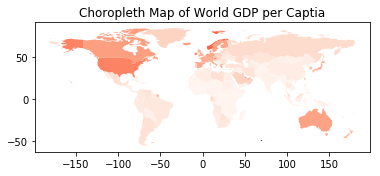

In [28]:
# maps
# http://geopandas.org/mapping.html#choropleth-maps

world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap',
           #'pop_est', 
           cmap='Reds')

plt.title('Choropleth Map of World GDP per Captia')
plt.show()

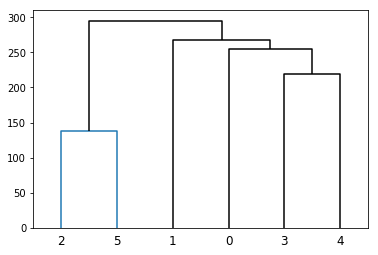

In [29]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster import hierarchy


hierarchy.set_link_color_palette(colors[1:])

ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z, above_threshold_color='black')



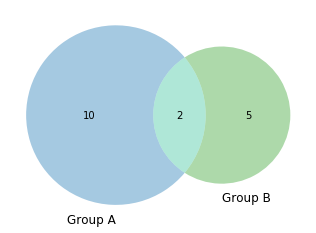

In [30]:
# https://python-graph-gallery.com/170-basic-venn-diagram-with-2-groups/
from matplotlib_venn import venn2
 
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'), set_colors=(colors[1], colors[3]))
plt.show()

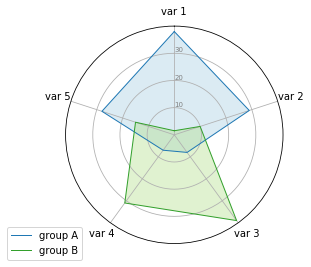

In [31]:
# https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var 1': [38, 1.5, 30, 4],
'var 2': [29, 10, 9, 34],
'var 3': [8, 39, 23, 24],
'var 4': [7, 31, 33, 14],
'var 5': [28, 15, 32, 14]
})

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color=colors[1], linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, colors[0], alpha=0.4)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, color=colors[3], linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, colors[2], alpha=0.4)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


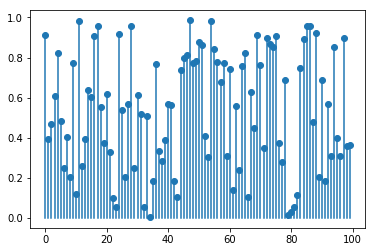

In [32]:
# https://python-graph-gallery.com/180-basic-lollipop-plot/

values = np.random.uniform(size=100)

(markers, stemlines, baseline) = plt.stem(values)
plt.setp(baseline, visible=False)
plt.show()

In [33]:
# http://sbebo.github.io/blog/blog/2017/08/01/joypy/
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn import datasets

# load the iris dataset from sklearn
ds = datasets.load_iris()

# creata a pandas DataFrame from the iris dataset
iris = pd.DataFrame(data=ds.data, columns=ds.feature_names)

# add the target column (name of the flower) to the DataFrame
iris["target"] = ds.target
# the target column will specify the number of the flower that has to be mapped to
# the target_name data that holds the full name of the flower
iris["targetName"] = iris.apply(lambda row: ds.target_names[int(row.target)], axis=1)

# drop the target column (not used anymore)
iris = iris.drop("target", axis=1)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targetName
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


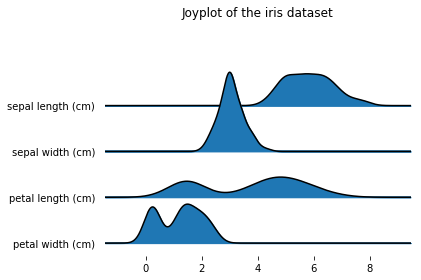

In [34]:
fig, axes = joypy.joyplot(iris, title='Joyplot of the iris dataset')#.iloc[:, :4])

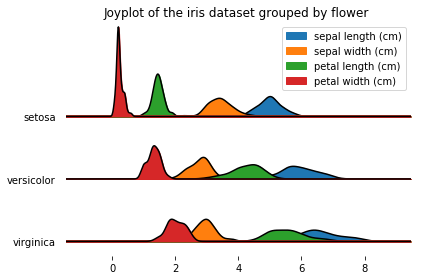

In [35]:
fig, axes = joypy.joyplot(iris, by="targetName", 
                          title='Joyplot of the iris dataset grouped by flower ', 
                          legend=True)

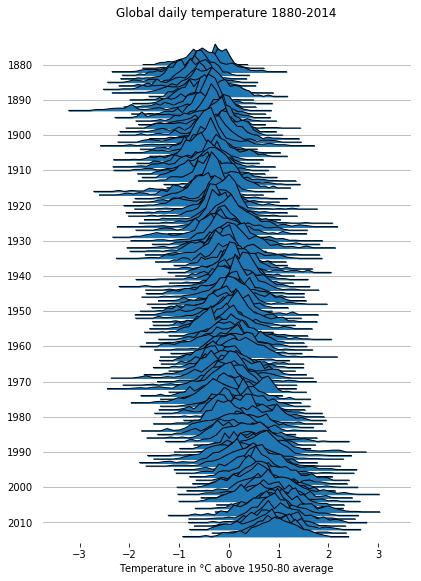

In [36]:
# http://sbebo.github.io/blog/blog/2017/08/01/joypy/
# http://berkeleyearth.org/data/
temp = pd.read_csv("data/daily_temp.csv",comment="%")
labels=[y if y%10==0 else None for y in list(temp.Year.unique())]

fig, axes = joypy.joyplot(temp, by="Year", 
                          column="Anomaly", labels=labels, range_style='own',
                          grid="y", linewidth=1, legend=False, figsize=(6,8),
                          title="Global daily temperature 1880-2014",
                          kind='counts', bins=30)

ax = axes[-1]
ax.set_xlabel("Temperature in °C above 1950-80 average")
ax.xaxis.set_visible(True)
#ax.yaxis.set_ticks([])


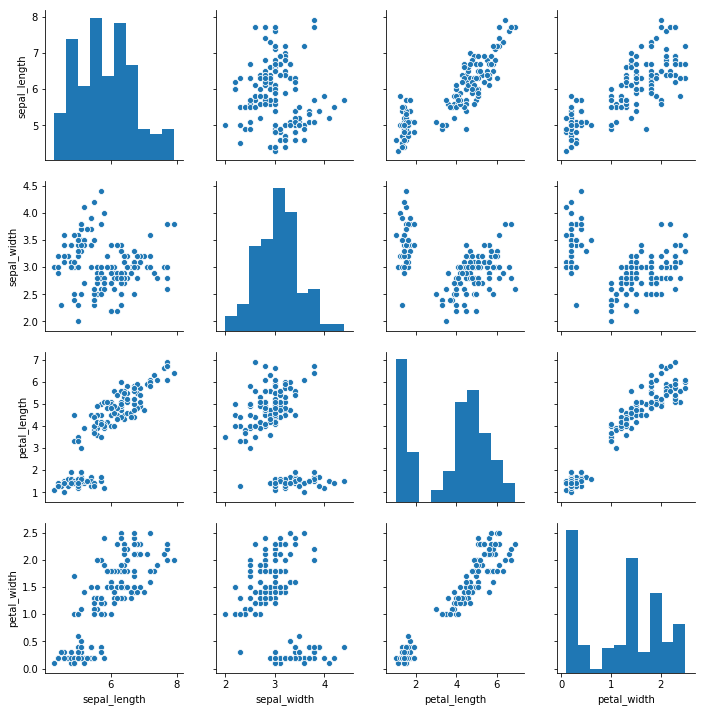

In [37]:
# https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/

import seaborn as sns
df = sns.load_dataset('iris')
import matplotlib.pyplot as plt
 
# Basic correlogram
sns.pairplot(df)
plt.show()


Text(0.5, 1.0, 'Sankey diagram with default settings')

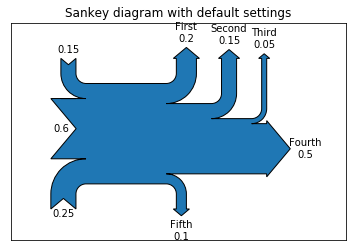

In [38]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
# basic sankey chart
Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10], 
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'], 
       orientations=[-1, 1, 0, 1, 1, 1, 0,-1]).finish()
plt.title("Sankey diagram with default settings")


In [1]:
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

layout = Layout(width="300", height="200")
def sankey(margin_top=10, **value):
    """Show SankeyWidget with default values for size and margins"""
    return SankeyWidget(layout=layout,
                        margins=dict(top=margin_top, bottom=0, left=30, right=60),
                        **value)

links = [
    {'source': 'A', 'target': 'B', 'value': 3, 'type': 'x'},
    {'source': 'B', 'target': 'C', 'value': 2, 'type': 'y'},
    {'source': 'B', 'target': 'D', 'value': 1, 'type': 'z'},
]
sankey(links=links)

SankeyWidget(layout=Layout(height='200', width='300'), links=[{'source': 'A', 'target': 'B', 'value': 3, 'type…

In [2]:
import pandas as pd

# define 8 diverging colors for every energy type using colorbrewer
# http://colorbrewer2.org/#type=diverging&scheme=BrBG&n=8
energy_colors = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']

# read energy data file using pandas
df = pd.read_excel('data/energiebilanz2017.xlsx', 
                   #sheet_name='Energiebilanz2017',
                   sheet_name='EnergyBalance2017',
                   skiprows=17).iloc[:, :8]

df

,Energy balance of Germany 2017 T Joule,Hard coals,Brown coals,Mineral Oils,Gas,Renewable Energy,Other Energy Sources,Electricity and Nuclear Power
0,Production,107966,1539800,94245,254216,1820399,234637,0
1,Import,1410938,643,5601377,4019182,34659,0,932911
2,Inventory Withdrawal,0,80,62949,22456,0,0,0
3,Energy Volume,1518904,1540523,5758569,4295854,1855058,234637,932911
4,Export,30852,32100,975071,1129268,57599,0,289265
5,Marine Bunkers,0,0,95681,0,0,0,0
6,Inventory Restocking,-14000,1127,16501,0,0,0,0
7,Primary Consumption,1502051,1507296,4671315,3166586,1797459,234637,643647


In [3]:
links = []
category_names = df.iloc[:, 0]

# helper function for creatin a link for the Sankey chart
def create_link(source, target, value, t, color):
    return {"source": source, "target": target, "value": value, "type": t, "color": color}

# iterate over DataFrame columns (energy types)
for i, column in enumerate(df.iloc[:, 1:]):
    
    # get column values as Series and column name
    values = df[column]  # categories: production, import, consumption, export
    t = values.name
    
    # create links
    # rows 0 (production), 1 (import), 2 (inventory) --> row 3 (energy volume)
    links.append(create_link(category_names[0], t, values[0], t, energy_colors[i]))
    links.append(create_link(category_names[1], t, values[1], t, energy_colors[i]))
    links.append(create_link(category_names[2], t, values[2], t, energy_colors[i]))
    
    # row 3 --> row 4 (export), 5 (bunkers), 6 (inventory), 7 (consumption)
    links.append(create_link(t, category_names[4], values[4], t, energy_colors[i]))
    links.append(create_link(t, category_names[5], values[5], t, energy_colors[i]))
    links.append(create_link(t, category_names[6], values[6], t, energy_colors[i]))
    links.append(create_link(t, category_names[7], values[7], t, energy_colors[i]))
    

w = SankeyWidget(links=links,
                 layout = Layout(width="800", height="400"),
                 margins=dict(top=0, bottom=0, left=150, right=170))

print("German Energy Balance 2017 (data from https://ag-energiebilanzen.de/7-0-Bilanzen-1990-2017.html)")
w

German Energy Balance 2017 (data from https://ag-energiebilanzen.de/7-0-Bilanzen-1990-2017.html)


SankeyWidget(layout=Layout(height='400', width='800'), links=[{'source': 'Production', 'target': 'Hard coals',…

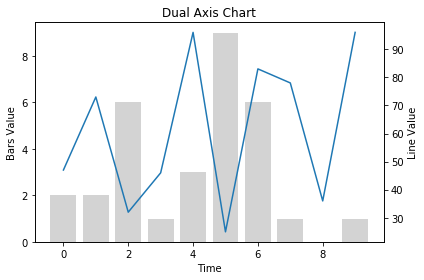

In [42]:
# dual axes chart

np.random.seed(123)
y = np.array([np.random.randint(10, size=10),
              np.random.randint(100, size=10)])

fig, ax = plt.subplots()
# create bar chart
ax.bar(range(10), y[0], color='lightgrey') 

# create second axes with line chart
ax2 = ax.twinx()
ax2.plot(range(10), y[1], color=colors[1])

# add labels
plt.title('Dual Axis Chart')
ax.set_xlabel('Time')
ax.set_ylabel('Bars Value')
ax2.set_ylabel('Line Value')


fig.tight_layout() 
plt.show()